<a href="https://colab.research.google.com/github/DavidMartinez16/Deep-Learning-Tensorflow/blob/master/Movie_Poster_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 40kB/s 
     |████████████████████████████████| 501kB 45.6MB/s 
     |████████████████████████████████| 4.3MB 50.7MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 45.21 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [4]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
img_width, img_height = 350, 350

x= []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)

x = np.array(x)

100%|██████████| 7254/7254 [00:28<00:00, 257.28it/s]


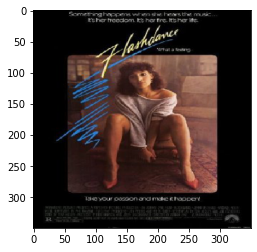

In [6]:
plt.imshow(x[1])

In [7]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [8]:
y = data.drop(['Id','Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=0)

In [10]:
x_train.shape, x_test.shape

((6165, 350, 350, 3), (1089, 350, 350, 3))

**Build the CNN**

In [20]:
# Build the CNN
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test), verbose=1)

Train on 6165 samples, validate on 1089 samples
Epoch 1/8
6165/6165 [==============================] - 17s 3ms/sample - loss: 0.6921 - accuracy: 0.6450 - val_loss: 2.5045 - val_accuracy: 0.4794
Epoch 2/8
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.3093 - accuracy: 0.8906 - val_loss: 0.2475 - val_accuracy: 0.9073
Epoch 3/8
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2606 - accuracy: 0.9073 - val_loss: 0.2511 - val_accuracy: 0.9076
Epoch 4/8
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2508 - accuracy: 0.9096 - val_loss: 0.2467 - val_accuracy: 0.9072
Epoch 5/8
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2450 - accuracy: 0.9116 - val_loss: 0.2426 - val_accuracy: 0.9070
Epoch 6/8
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2409 - accuracy: 0.9126 - val_loss: 0.2566 - val_accuracy: 0.9067
Epoch 7/8
6165/6165 [==============================] - 14s 2ms/sample - loss

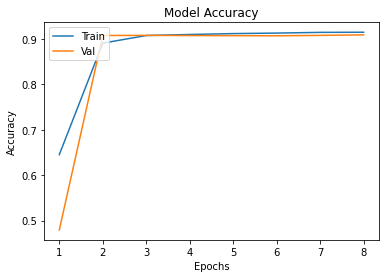

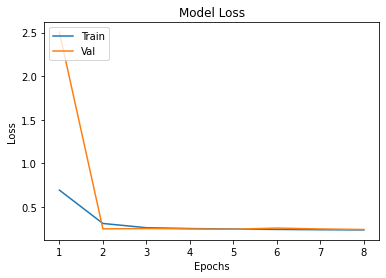

In [25]:
# Plot the learning curve
epoch_range = range(1,9)
# Model Accuracy
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# Model Loss
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

**Testing the model**

Comedy
Drama
Adventure


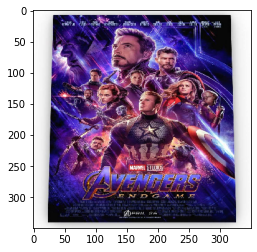

In [30]:
img = image.load_img('endgame.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Action
Adventure


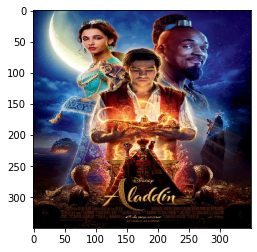

In [31]:
img = image.load_img('aladin.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Action
Horror


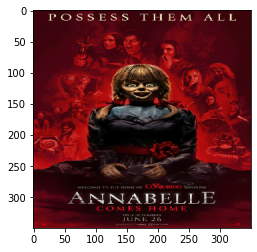

In [32]:
img = image.load_img('ana.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Action
Crime


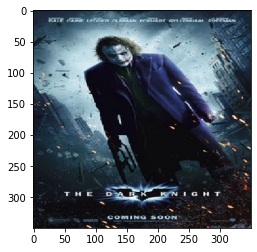

In [33]:
img = image.load_img('joker.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])